<a href="https://colab.research.google.com/github/ank-d/Stock-Market-Prediction-Based-on-Stock-Data-and-News-Sentiment/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,confusion_matrix,accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

scaler=MinMaxScaler()


In [ ]:

# Load stock market data (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('FinalMeta_Data.csv')
# data.head()
data=data[['High', 'Low', 'Open', 'Volume','Close','Polarity']]
# data.head()

modifyData=data['Close'].shift()
data['prev_close']=modifyData
modifyData=data['Open'].shift()
data['prev_open']=modifyData
modifyData=data['High'].shift()
data['prev_high']=modifyData
modifyData=data['Volume'].shift()
data['prev_volume']=modifyData
modifyData=data['Low'].shift()
data['prev_low']=modifyData
data.head()






,High,Low,Open,Volume,Close,Polarity,prev_close,prev_open,prev_high,prev_volume,prev_low
0,8951.799805,8888.650391,8943.700195,189900,8896.700195,0.000000,NaN,NaN,NaN,NaN,NaN
1,8914.750000,8867.599609,8898.950195,293600,8879.599609,0.333333,8896.700195,8943.700195,8951.799805,189900.0,8888.650391
2,8960.799805,8898.599609,8904.400391,205900,8945.799805,0.000000,8879.599609,8898.950195,8914.750000,293600.0,8867.599609
3,8992.500000,8879.799805,8982.849609,218800,8899.750000,-0.285714,8945.799805,8904.400391,8960.799805,205900.0,8898.599609
4,8907.099609,8860.099609,8883.500000,202600,8897.549805,-0.166667,8899.750000,8982.849609,8992.500000,218800.0,8879.799805


In [ ]:
#drop null
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 1 to 723
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         723 non-null    float64
 1   Low          723 non-null    float64
 2   Open         723 non-null    float64
 3   Volume       723 non-null    int64  
 4   Close        723 non-null    float64
 5   Polarity     723 non-null    float64
 6   prev_close   723 non-null    float64
 7   prev_open    723 non-null    float64
 8   prev_high    723 non-null    float64
 9   prev_volume  723 non-null    float64
 10  prev_low     723 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 67.8 KB


<Axes: >

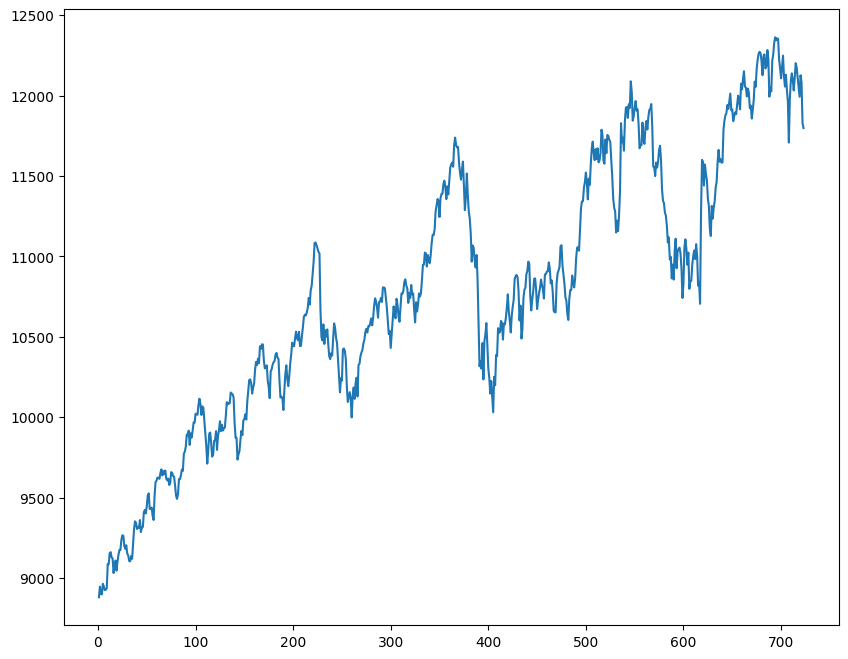

In [ ]:
data['Close'].plot(figsize=(10,8))

In [ ]:

# Select relevant features (consider feature engineering and domain knowledge)
# features1 = ['Open','prev_close','prev_open','prev_high','prev_low']  # Adjust based on your analysis
features1 = ['High', 'Low', 'Open', 'Volume']  # Adjust based on your analysis
# features1 = ['High', 'Low', 'Open', 'Volume','Adj Close']  # Adjust based on your analysis


target = 'Close'

# Handle missing values (consider imputation techniques or dropping rows)
# data = data.dropna()  # Simple approach, may require more sophisticated handling

# Split data into training and testing sets
# X = data[features1].values.reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(data[X]),scaler.transform(data[target]), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data[features1],data[target], test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)




[ 9.30221725e-01  7.35747478e-01 -6.69692601e-01  4.50789059e-06]
35.535351525990336


In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mae=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(model.score(X_test,y_test))


# Predict closing price for the next day using the last day's data
# Ensure you have data for the most recent day
last_day_data = data.iloc[-1, :][features1]  # Select features from last row
next_day_predicted_close = model.predict([last_day_data.values])[0]

print(f"Predicted Closing Price for Next Day: {next_day_predicted_close:.2f}")

Mean Absolute Error: 17.84
Mean Squared Error: 556.17
R-squared: 1.00
0.9992338677508626
Predicted Closing Price for Next Day: 11804.24


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Select relevant features (consider feature engineering and domain knowledge)
# features2 = ['Open','prev_close','prev_open','prev_high','prev_low','Polarity']
features2 = ['High', 'Low', 'Open', 'Volume','Polarity']  # Adjust based on your analysis
  # Adjust based on your analysis
target = 'Close'

# Handle missing values (consider imputation techniques or dropping rows)
# data = data.dropna()  # Simple approach, may require more sophisticated handling

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(data[features2]),scaler.transform(data[target]), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data[features2],data[target], test_size=0.2, random_state=42)


# Create and train the linear regression model
modelY = LinearRegression()
modelY.fit(X_train, y_train)

print(modelY.coef_)
print(modelY.intercept_)

[ 9.30321013e-01  7.35928096e-01 -6.69947913e-01  4.44292997e-06
 -9.67978608e-01]
35.427421861524635


In [ ]:
# Make predictions on the testing set
y_pred = modelY.predict(X_test)

# Evaluate model performance
mae=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(modelY.score(X_test,y_test))


# Predict closing price for the next day using the last day's data
# Ensure you have data for the most recent day
last_day_data = data.iloc[-1, :][features2]
print(last_day_data)# Select features from last row
next_day_predicted_close = modelY.predict([last_day_data.values])[0]

print(f"Predicted Closing Price for Next Day: {next_day_predicted_close:.2f}")

Mean Absolute Error: 17.83
Mean Squared Error: 555.09
R-squared: 1.00
0.9992353637815311
High         11883.049805
Low          11779.900391
Open         11877.500000
Volume      461000.000000
Polarity        -0.250000
Name: 723, dtype: float64
Predicted Closing Price for Next Day: 11804.62


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PLOT OF WITH POLATRITY SCORE AND WITHOUT POLARITY SCORE

In [ ]:

import matplotlib.pyplot as plt

# x=data[features]
# z=data[features2]
# predicted=model.predict(x)
# predictedY=model2.predict(z)

# y=data[target]

# plt.figure(figsize=(10, 8))
# plt.plot(y,label='Actual')
# plt.plot(predicted,label='Predicted')
# plt.plot(predictedY,label='Predicted with Polarity Score')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title("Comparative Study")
# plt.legend()
# plt.show()

import plotly.graph_objects as go

# Assuming you have already imported data, features, features2, model, model2, and target
x=data[features1]
z=data[features2]
# Make predictions
predicted = model.predict(x)
predictedY = modelY.predict(z)
y=data[target]
# Create a Plotly figure
fig = go.Figure()

# Add traces for actual, predicted, and predicted with polarity score
fig.add_trace(go.Scatter(x=data.index, y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data.index, y=predicted.flatten(), mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data.index, y=predictedY.flatten(), mode='lines', name='Predicted with Polarity Score'))


# Update layout for better readability
fig.update_layout(
    title="Comparative Study",
    xaxis_title="Index",
    yaxis_title="Value",
    autosize=False,
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

# Show the plot
fig.show()

